# **Importer data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 26.6 MB/s eta 0:00:00


In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
Scopus = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/methodologie/Scopus.csv')

In [ ]:
Scopus

Authors  \
0                                              Zaman U.   
1               Green A.W.; Oliver D.; Woszczynski A.B.   
2                                 Nolan M.P.; Martin R.   
3     Morita A.; Lim H.W.; Passeron T.; Goh C.L.; Ka...   
4                        Biliatska V.Р.; Rarytskyi O.A.   
...                                                 ...   
2120                                         Hurault L.   
2121              Orwant J.E.; Orwant C.J.; Pallak M.S.   
2122                                        Krippner S.   
2123                                         Jones M.C.   
2124                           Fritzen R.D.; Mazer G.E.   

                                      Author full names  \
0                             Zaman, Umer (57207206856)   
1     Green, Andrew William (55456523200); Oliver, D...   
2     Nolan, Meghan P. (59217877100); Martin, Rebecc...   
3     Morita, A. (7102118336); Lim, H.W. (7403095264...   
4     Biliatska, Valentina Р. (57369171100); Rarytsk...   
...                                                 ...   
2120                          Hurault, L. (24584554700)   
2121  Orwant, Jack E. (57189189953); Orwant, Carol J...   
2122                    Krippner, Stanley (56360885100)   
2123                          Jones, M.C. (55491024100)   
2124  Fritzen, R.D. (6602905487); Mazer, G.E. (25952...   

                                           Author(s) ID  \
0                                           57207206856   
1                 55456523200; 57220483315; 57204997202   
2                              59217877100; 59354340100   
3     7102118336; 7403095264; 7004178755; 5719241414...   
4                              57369171100; 57215599645   
...                                                 ...   
2120                                        24584554700   
2121               57189189953; 35297550300; 6603410515   
2122                                        56360885100   
2123                                        55491024100   
2124                            6602905487; 25952925200   

                                                  Title  Year  \
0     Nexus of Regenerative Tourism Destination Comp...  2024   
1     To report or not to report? Extending Protecti...  2024   
2     The Crossroads of Crime Writing: Unseen Struct...  2024   
3     Attitudes and behaviors regarding sun exposure...  2024   
4     THE ANTHOLOGY “STATE OF WAR”: SYNERGY, PROBLEM...  2024   
...                                                 ...   ...   
2120  Tendance générale au relachement de la précisi...  1971   
2121  Effects of Fear Appeals on Opinions about U.S....  1970   
2122  Why Worry if the Whole Game is Up? Perspective...  1973   
2123                The Elimination of Children's Fears  1924   
2124  The effects of fear appeal and communication u...  1975   

                                           Source title Volume Issue Art. No.  \
0                          Sustainability (Switzerland)     16    17     7827   
1                                Computers and Security    142   NaN   103880   
2     The Crossroads of Crime Writing: Unseen Struct...    NaN   NaN      NaN   
3                                Journal of Dermatology     51     7      NaN   
4     Visnyk Universitetu Imeni Alfreda Nobelya. Ser...      1    27      NaN   
...                                                 ...    ...   ...      ...   
2120                                    Photogrammetria     27     3      NaN   
2121          Journalism & Mass Communication Quarterly     47     2      NaN   
2122                             Journal of Drug Issues      3     4      NaN   
2123                 Journal of Experimental Psychology      7     5      NaN   
2124                          Journal of Drug Education      5     2      NaN   

     Page start  ...                              ISBN  CODEN   PubMed ID  \
0           NaN  ...                               NaN    NaN         NaN   
1           N

In [ ]:
Scopus.columns

Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Affiliations',
       'Authors with affiliations', 'Abstract', 'Author Keywords',
       'Index Keywords', 'Molecular Sequence Numbers', 'Chemicals/CAS',
       'Tradenames', 'Manufacturers', 'Funding Details', 'Funding Texts',
       'References', 'Correspondence Address', 'Editors', 'Publisher',
       'Sponsors', 'Conference name', 'Conference date', 'Conference location',
       'Conference code', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')

In [ ]:
Scopus.shape

(2125, 46)

# **Evolution temporelle**

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Étape 1 : Récupérer les données par année
yearly_counts = Scopus['Year'].value_counts().sort_index()

# Définir les seuils pour les périodes creuses et actives
seuil_creux = 5  # Exemple : moins de 5 publications
seuil_actif = 15  # Exemple : plus de 15 publications

# Identifie les périodes creuses et actives
periodes_creuses = yearly_counts[yearly_counts <= seuil_creux]
periodes_actives = yearly_counts[yearly_counts >= seuil_actif]

# Étape 2 : Construire le graphique
fig = go.Figure()

# Ajouter la courbe principale (nombre de publications)
fig.add_trace(go.Scatter(
    x=yearly_counts.index,
    y=yearly_counts.values,
    mode='lines+markers',
    name='Nombre de publications',
    line=dict(color='blue'),
    marker=dict(size=6)
))

# Ajouter les points des périodes creuses
fig.add_trace(go.Scatter(
    x=periodes_creuses.index,
    y=periodes_creuses.values,
    mode='markers',
    name='Périodes creuses',
    marker=dict(color='red', size=10, symbol='circle')
))

# Ajouter les points des périodes actives
fig.add_trace(go.Scatter(
    x=periodes_actives.index,
    y=periodes_actives.values,
    mode='markers',
    name='Périodes actives',
    marker=dict(color='green', size=10, symbol='diamond')
))

# Étape 3 : Mise en forme du graphique
fig.update_layout(
    title="Évolution temporelle des publications scientifiques avec périodes actives et creuses",
    xaxis_title="Année",
    yaxis_title="Nombre de publications",
    template="plotly_white",
    legend_title="Légende"
)

# Afficher le graphique
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Charger les données
Scopus['Year'] = pd.to_numeric(Scopus['Year'], errors='coerce')

# Étape 1 : Analyser les périodes
yearly_counts = Scopus['Year'].value_counts().sort_index()  # Compte des publications par année
total_publications = yearly_counts.sum()  # Total des publications

# Période globale
start_year = yearly_counts.index.min()  # Année de la première publication
end_year = yearly_counts.index.max()  # Année actuelle

# Période récente (par exemple, 30 dernières années actives avec publications)
recent_start = end_year - 29
recent_publications = yearly_counts[yearly_counts.index >= recent_start].sum()  # Publications sur cette période
pourcentage_recent = (recent_publications / total_publications) * 100  # Pourcentage

# Période intermédiaire (autres années avant la période récente)
intermediate_publications = yearly_counts[yearly_counts.index < recent_start].sum()
pourcentage_intermediate = (intermediate_publications / total_publications) * 100

# Étape 2 : Création de la figure
fig = go.Figure()

# Ligne principale (toute la période)
fig.add_trace(go.Scatter(
    x=[start_year, end_year],
    y=[1, 1],
    mode="lines",
    line=dict(color="blue", width=5),
    showlegend=False
))

# Ligne pour la période intermédiaire (orange, sur la même ligne)
fig.add_trace(go.Scatter(
    x=[start_year, recent_start],
    y=[1, 1],
    mode="lines",
    line=dict(color="orange", width=8),
    showlegend=False
))

# Ligne pour la période récente (verte, sur la même ligne)
fig.add_trace(go.Scatter(
    x=[recent_start, end_year],
    y=[1, 1],
    mode="lines",
    line=dict(color="green", width=8),
    showlegend=False
))

# Étape 3 : Ajouter des annotations
# Annotations des années
fig.add_trace(go.Scatter(
    x=[start_year, recent_start, end_year],
    y=[1.05, 1.05, 1.05],
    mode="text",
    text=[start_year, recent_start, end_year],
    textposition="top center",
    showlegend=False
))

# Annotations des pourcentages (en haut de la ligne)
fig.add_annotation(
    x=(recent_start + end_year) / 2,  # Milieu de la période récente
    y=1.2,
    text=f"{pourcentage_recent:.1f}%",
    showarrow=False,
    font=dict(size=16, color="green")
)

fig.add_annotation(
    x=(start_year + recent_start) / 2,  # Milieu de la période intermédiaire
    y=1.2,
    text=f"{pourcentage_intermediate:.1f}%",
    showarrow=False,
    font=dict(size=16, color="orange")
)

# Annotations des nombres de publications (en bas de la ligne)
fig.add_annotation(
    x=(recent_start + end_year) / 2,  # Milieu de la période récente
    y=0.8,
    text=f"({recent_publications:,} publications)",
    showarrow=False,
    font=dict(size=14, color="green")
)

fig.add_annotation(
    x=(start_year + recent_start) / 2,  # Milieu de la période intermédiaire
    y=0.8,
    text=f"({intermediate_publications:,} publications)",
    showarrow=False,
    font=dict(size=14, color="orange")
)

fig.add_annotation(
    x=(start_year + end_year) / 2,
    y=0.6,
    text=f"Total: {total_publications:,} publications",
    showarrow=False,
    font=dict(size=14, color="black")
)

# Flèches au crochet pour chaque période
# Flèche pour la période intermédiaire
fig.add_annotation(
    x=recent_start,
    y=1,
    ax=start_year,
    ay=1,
    xref="x",
    yref="y",
    axref="x",
    ayref="y",
    showarrow=True,
    arrowhead=4,
    arrowsize=2,
    arrowwidth=2,
    arrowcolor="orange"
)

# Flèche pour la période récente
fig.add_annotation(
    x=end_year,
    y=1,
    ax=recent_start,
    ay=1,
    xref="x",
    yref="y",
    axref="x",
    ayref="y",
    showarrow=True,
    arrowhead=4,
    arrowsize=2,
    arrowwidth=2,
    arrowcolor="green"
)

# Étape 4 : Mise en forme
fig.update_layout(
    title="Chronologie des publications scientifiques avec périodes",
    xaxis=dict(title="Année", range=[start_year - 10, end_year + 10]),
    yaxis=dict(visible=False),
    template="plotly_white",
    showlegend=False,
    height=300
)

# Afficher le graphique
fig.show()


# **Journals**

In [ ]:
import plotly.express as px

# Plot top journals
top_journals = Scopus['Source title'].value_counts().head(20).reset_index()
top_journals.columns = ['Source title', 'Publication']

# Trier les journaux par ordre décroissant des publications
top_journals = top_journals.sort_values('Publication', ascending=True)  # Important pour l'orientation 'h'

fig = px.bar(top_journals, x='Publication', y='Source title', orientation='h', title='Top 10 des Journals par nombre de publications', color='Publication')
fig.show()

# **Citation**

In [ ]:
import re
import pandas as pd
Scopus = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/methodologie/Scopus.csv')

# Fonction pour nettoyer et extraire les noms des auteurs
def clean_authors(author_string):
    # Vérifier si l'entrée est une chaîne de caractères
    if not isinstance(author_string, str):
        return []

    # Supprimer les numéros entre parenthèses (par exemple (57207206856))
    author_string = re.sub(r'\(\d+\)', '', author_string)

    # Séparer les auteurs par le point-virgule ';'
    authors = author_string.split(';')

    # Nettoyer chaque auteur (enlever les espaces superflus) et supprimer la virgule
    cleaned_authors = []
    for author in authors:
        author = author.strip()  # Enlever les espaces superflus
        # Supprimer la virgule qui sépare le nom et prénom
        author = author.replace(',', '')  # Supprimer la virgule
        cleaned_authors.append(author)

    return cleaned_authors

# Appliquer cette fonction à la colonne 'Author full names'
Scopus['AuthorsNames'] = Scopus['Author full names'].apply(clean_authors)

# Examiner les premières lignes pour vérifier le nettoyage
print(Scopus[['Author full names', 'AuthorsNames']].head())


                                   Author full names  \
0                          Zaman, Umer (57207206856)   
1  Green, Andrew William (55456523200); Oliver, D...   
2  Nolan, Meghan P. (59217877100); Martin, Rebecc...   
3  Morita, A. (7102118336); Lim, H.W. (7403095264...   
4  Biliatska, Valentina Р. (57369171100); Rarytsk...   

                                        AuthorsNames  
0                                       [Zaman Umer]  
1  [Green Andrew William, Oliver DeJarvis, Woszcz...  
2                  [Nolan Meghan P., Martin Rebecca]  
3  [Morita A., Lim H.W., Passeron T., Goh C.L., K...  
4        [Biliatska Valentina Р., Rarytskyi Oleg A.]  


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Trier les données par la colonne 'Citation' par ordre décroissant et sélectionner les 5 premières
top_citations = Scopus.sort_values(by='Cited by', ascending=False).head(10)

# Créer un tableau pour les 10 publications les plus citées
fig = go.Figure(data=[go.Table(
    header=dict(
        values=["<b>Rank</b>", "<b>Title</b>", "<b>Authors</b>", "<b>Year</b>", "<b>Source</b>", "<b>Citations</b>"],
        fill_color="skyblue",
        align="center",
        font=dict(color="black", size=12)
    ),
    cells=dict(
        values=[
            list(range(1, 11)),  # Rang (1 à 10)
            top_citations['Title'],  # Titres
            top_citations['AuthorsNames'],  # Auteurs
            top_citations['Year'].astype(int),  # Années
            top_citations['Source title'],  # Sources
            top_citations['Cited by']  # Comptes de citations
        ],
        fill_color="white",
        align="center",
        font=dict(color="black", size=11)
    )
)])

# Mettre à jour la mise en page
fig.update_layout(
    title="Top 10 Most Cited Publications",
    width=1700,  # Augmenter la largeur si nécessaire
    height=500  # Augmenter la hauteur pour afficher toutes les lignes
)

# Afficher le tableau
fig.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import pandas as pd

Scopus = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/methodologie')

# Créer un graphe vide
G = nx.Graph()

# Ajouter des arêtes entre les auteurs co-cités
for _, row in Scopus.iterrows():
    authors = row['AuthorsNames']  # Liste des auteurs nettoyés
    # Pour chaque paire d'auteurs dans le même article, ajouter une arête
    for author1, author2 in combinations(authors, 2):
        author1 = author1.strip()  # Enlever les espaces superflus
        author2 = author2.strip()
        if G.has_edge(author1, author2):
            G[author1][author2]['weight'] += 1  # Augmenter le poids si l'arête existe déjà
        else:
            G.add_edge(author1, author2, weight=1)  # Ajouter une nouvelle arête avec poids = 1

# Vérifier la création du graphe
print(f"Nombre d'arêtes : {G.number_of_edges()}")
print(f"Nombre de nœuds : {G.number_of_nodes()}")

# Filtrer les nœuds pour ne garder que ceux avec un degré élevé
degree_threshold = 10  # Augmenter le seuil de filtrage
filtered_nodes = [n for n in G.nodes if G.degree(n) >= degree_threshold]
G_filtered = G.subgraph(filtered_nodes)

# Calculer le degré de chaque nœud pour la couleur et la taille
degrees = dict(G_filtered.degree())
node_colors = [degrees[n] for n in G_filtered.nodes()]
node_sizes = [300 + 20 * degrees[n] for n in G_filtered.nodes()]  # Augmenter la taille des nœuds

# Extraire les poids des arêtes pour la couleur et l'épaisseur
edge_weights = [G_filtered[u][v]['weight'] for u, v in G_filtered.edges()]
edge_colors = [G_filtered[u][v]['weight'] for u, v in G_filtered.edges()]
edge_widths = [1 + 0.2 * G_filtered[u][v]['weight'] for u, v in G_filtered.edges()]  # Augmenter l'épaisseur des arêtes

# Visualiser le réseau de co-citations
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G_filtered, k=0.5)  # Ajuster le paramètre k pour une meilleure disposition

# Dessiner les nœuds avec des couleurs et des tailles différentes
nodes = nx.draw_networkx_nodes(G_filtered, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.plasma, alpha=0.8)

# Dessiner les arêtes avec des couleurs et des épaisseurs différentes
edges = nx.draw_networkx_edges(G_filtered, pos, width=edge_widths, edge_color=edge_colors, edge_cmap=plt.cm.Blues, alpha=0.6)

# Dessiner les labels des nœuds seulement pour les nœuds importants
labels = {n: n if degrees[n] >= degree_threshold else '' for n in G_filtered.nodes()}
nx.draw_networkx_labels(G_filtered, pos, labels, font_size=10, font_color='black')  # Augmenter la taille des étiquettes

# Ajouter une barre de couleur pour les nœuds
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, label='Degré des nœuds')

# Ajouter une barre de couleur pour les arêtes
sm_edges = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(edge_colors), vmax=max(edge_colors)))
sm_edges.set_array([])
plt.colorbar(sm_edges, label='Poids des arêtes')

# Ajouter un titre
plt.title("Réseau de co-auteurs filtré", fontsize=20)

# Afficher le graphe
plt.show()

IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/Colab Notebooks/methodologie'

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import pandas as pd

Scopus = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Scopus.csv')



# Créer un graphe vide pour la co-citation
G_co_citation = nx.Graph()

# Parcourir chaque article pour extraire les co-citations
for _, row in Scopus.iterrows():
    # Récupérer les références citées (supposons qu'elles sont séparées par ';')
    if pd.notna(row['References']):  # Vérifier si la colonne 'References' n'est pas vide
        cited_references = row['References'].split(';')
        cited_references = [ref.strip() for ref in cited_references if ref.strip()]  # Nettoyer les références

        # Pour chaque paire de références citées ensemble, ajouter une arête dans le graphe de co-citation
        for ref1, ref2 in combinations(cited_references, 2):
            if G_co_citation.has_edge(ref1, ref2):
                G_co_citation[ref1][ref2]['weight'] += 1  # Augmenter le poids si l'arête existe déjà
            else:
                G_co_citation.add_edge(ref1, ref2, weight=1)  # Ajouter une nouvelle arête avec poids = 1

# Vérifier la création du graphe de co-citation
print(f"Nombre d'arêtes dans le graphe de co-citation : {G_co_citation.number_of_edges()}")
print(f"Nombre de nœuds dans le graphe de co-citation : {G_co_citation.number_of_nodes()}")

# Filtrer les nœuds pour ne garder que ceux avec un degré élevé
degree_threshold = 5  # Ajustez ce seuil selon vos besoins
filtered_nodes = [n for n in G_co_citation.nodes if G_co_citation.degree(n) >= degree_threshold]
G_filtered = G_co_citation.subgraph(filtered_nodes)

# Calculer le degré de chaque nœud pour la couleur et la taille
degrees = dict(G_filtered.degree())
node_colors = [degrees[n] for n in G_filtered.nodes()]
node_sizes = [100 + 10 * degrees[n] for n in G_filtered.nodes()]

# Extraire les poids des arêtes pour la couleur et l'épaisseur
edge_weights = [G_filtered[u][v]['weight'] for u, v in G_filtered.edges()]
edge_colors = [G_filtered[u][v]['weight'] for u, v in G_filtered.edges()]
edge_widths = [0.5 + 0.1 * G_filtered[u][v]['weight'] for u, v in G_filtered.edges()]

# Visualiser le réseau de co-citation
plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G_filtered, k=0.5)  # Ajuster le paramètre k pour une meilleure disposition

# Dessiner les nœuds avec des couleurs et des tailles différentes
nodes = nx.draw_networkx_nodes(G_filtered, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.plasma, alpha=0.8)

# Dessiner les arêtes avec des couleurs et des épaisseurs différentes
edges = nx.draw_networkx_edges(G_filtered, pos, width=edge_widths, edge_color=edge_colors, edge_cmap=plt.cm.Blues, alpha=0.6)

# Dessiner les labels des nœuds seulement pour les nœuds importants
labels = {n: n if degrees[n] >= degree_threshold else '' for n in G_filtered.nodes()}
nx.draw_networkx_labels(G_filtered, pos, labels, font_size=8, font_color='black')

# Ajouter une barre de couleur pour les nœuds
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, label='Degré des nœuds')

# Ajouter une barre de couleur pour les arêtes
sm_edges = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(edge_colors), vmax=max(edge_colors)))
sm_edges.set_array([])
plt.colorbar(sm_edges, label='Poids des arêtes')

# Ajouter un titre
plt.title("Réseau de co-citation", fontsize=16)

# Afficher le graphe
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Scopus.csv'

Nombre d'arêtes après filtrage : 50
Nombre de nœuds après filtrage : 49


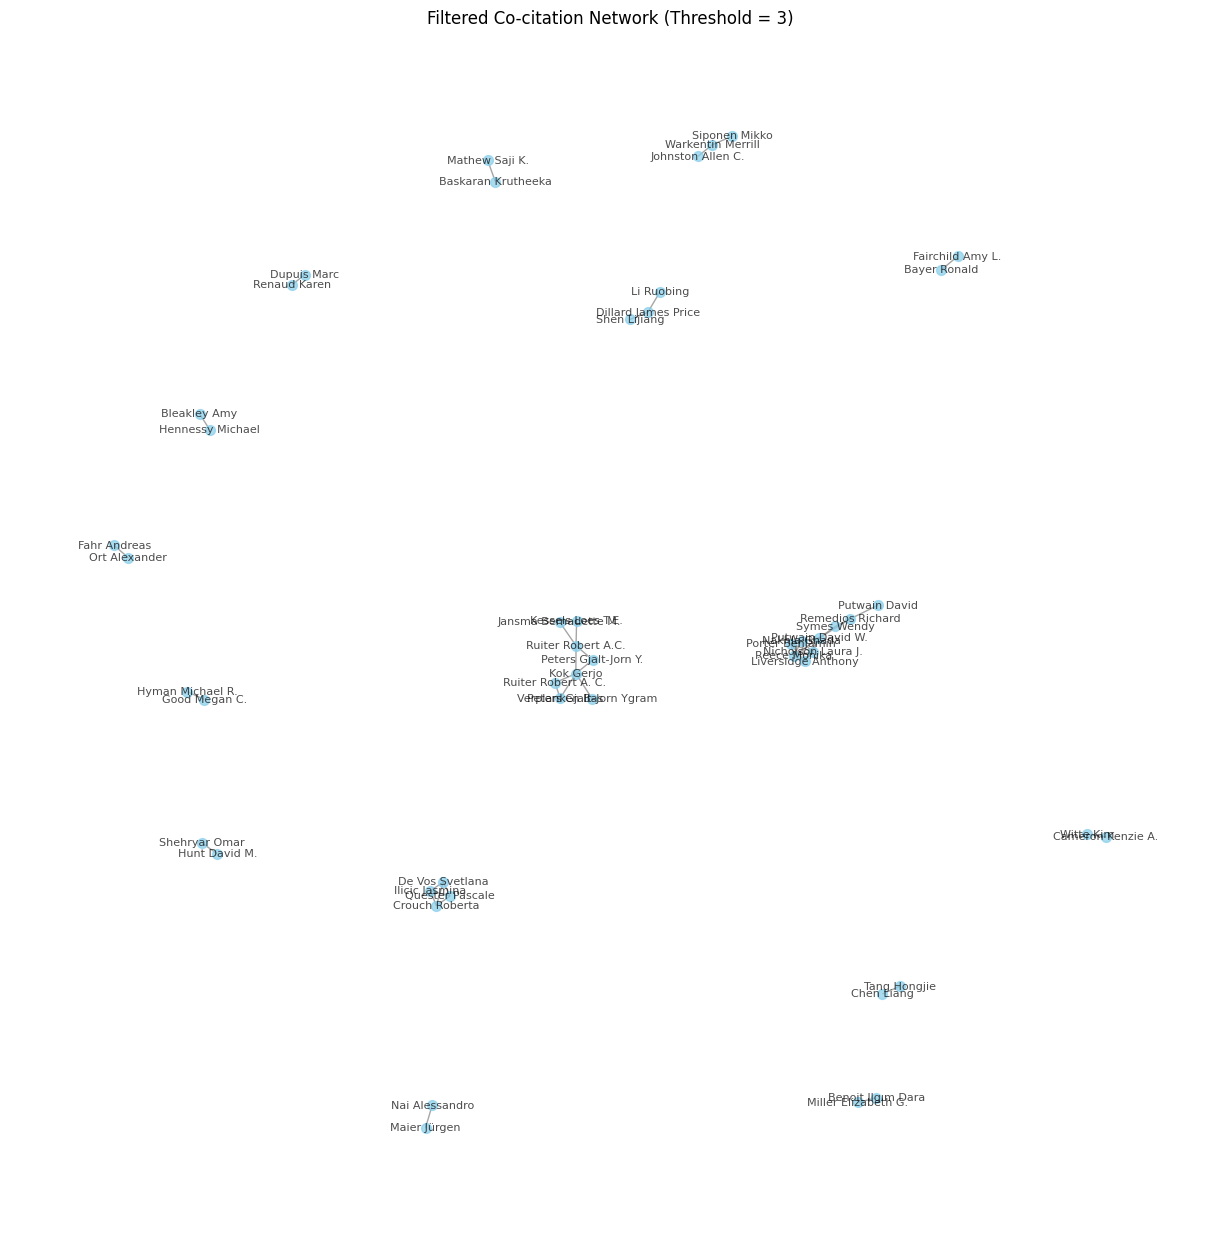

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Créer un graphe vide
G = nx.Graph()

# Ajouter des arêtes entre les auteurs co-cités
for _, row in Scopus.iterrows():
    authors = row['AuthorsNames']  # Liste des auteurs nettoyés
    # Pour chaque paire d'auteurs dans le même article, ajouter une arête
    for author1, author2 in combinations(authors, 2):
        author1 = author1.strip()  # Enlever les espaces superflus
        author2 = author2.strip()
        if G.has_edge(author1, author2):
            G[author1][author2]['weight'] += 1  # Augmenter le poids si l'arête existe déjà
        else:
            G.add_edge(author1, author2, weight=1)  # Ajouter une nouvelle arête avec poids = 1

# Filtrer les arêtes avec un poids supérieur à un seuil
threshold = 3  # Seuil du nombre de co-citations minimum
filtered_edges = [(author1, author2, data) for author1, author2, data in G.edges(data=True) if data['weight'] >= threshold]

# Créer un sous-graphe avec les arêtes filtrées
filtered_G = nx.Graph()
filtered_G.add_edges_from(filtered_edges)

# Vérifier la création du sous-graphe
print(f"Nombre d'arêtes après filtrage : {filtered_G.number_of_edges()}")
print(f"Nombre de nœuds après filtrage : {filtered_G.number_of_nodes()}")

# Visualiser le sous-graphe avec les co-citations importantes
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(filtered_G, k=0.15)  # Positionnement des nœuds avec une mise en page de ressort
nx.draw(filtered_G, pos, with_labels=True, node_size=50, font_size=8, alpha=0.7, node_color='skyblue', edge_color='gray')

# Ajouter un titre
plt.title(f"Filtered Co-citation Network (Threshold = {threshold})")

# Afficher le graphe
plt.show()


In [ ]:
import plotly.graph_objects as go
import networkx as nx
from itertools import combinations

# Créer un graphe vide
G = nx.Graph()

# Ajouter des arêtes entre les auteurs co-cités
for _, row in Scopus.iterrows():
    authors = row['AuthorsNames']  # Liste des auteurs nettoyés
    for author1, author2 in combinations(authors, 2):
        author1 = author1.strip()
        author2 = author2.strip()
        if G.has_edge(author1, author2):
            G[author1][author2]['weight'] += 1
        else:
            G.add_edge(author1, author2, weight=1)

# Extraire les positions des nœuds avec layout de réseau
pos = nx.spring_layout(G, k=0.15)

# Extraire les informations pour Plotly
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_y.append(y0)
    edge_y.append(y1)

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

# Créer le graph interactif avec Plotly
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Pour personnaliser la couleur des nœuds
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='Viridis',  # Utilisation d'une autre palette de couleurs
        size=10,
        colorbar=dict(thickness=15, title='Node Connections')
    )
)

# Ajouter les nœuds à la trace avec les couleurs et tailles des nœuds
node_trace.marker.color = [G.degree(node) for node in G.nodes()]  # La couleur dépend du degré
node_trace.marker.size = [G.degree(node) * 3 for node in G.nodes()]  # Taille des nœuds en fonction du degré

# Ajouter les informations de texte (nom des auteurs) sur les nœuds
node_trace.text = [node for node in G.nodes()]  # Affichage du nom de chaque auteur

# Tracer les arêtes et les nœuds
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    showlegend=False,
                    hovermode='closest',
                    title='Interactive Co-citation Network',
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)
                ))

fig.show()


In [ ]:
import plotly.graph_objects as go
import networkx as nx
from itertools import combinations

# Créer un graphe vide
G = nx.Graph()

# Ajouter des arêtes entre les auteurs co-cités
for _, row in Scopus.iterrows():
    authors = row['AuthorsNames']  # Liste des auteurs nettoyés
    for author1, author2 in combinations(authors, 2):
        author1 = author1.strip()
        author2 = author2.strip()
        if G.has_edge(author1, author2):
            G[author1][author2]['weight'] += 1
        else:
            G.add_edge(author1, author2, weight=1)

# Appliquer un seuil de poids pour filtrer les arêtes
threshold = 2  # Par exemple, ne conserver que les arêtes avec un poids supérieur ou égal à 2
filtered_edges = [(author1, author2, data) for author1, author2, data in G.edges(data=True) if data['weight'] >= threshold]

# Créer un sous-graphe avec les arêtes filtrées
filtered_G = nx.Graph()
filtered_G.add_edges_from(filtered_edges)

# Extraire les positions des nœuds avec layout de réseau
pos = nx.spring_layout(filtered_G, k=0.15)

# Extraire les informations pour Plotly
edge_x = []
edge_y = []
for edge in filtered_G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_y.append(y0)
    edge_y.append(y1)

node_x = []
node_y = []
for node in filtered_G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

# Créer le graph interactif avec Plotly
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Pour personnaliser la couleur des nœuds
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='Viridis',  # Utilisation d'une autre palette de couleurs
        size=10,
        colorbar=dict(thickness=15, title='Node Connections')
    )
)

# Ajouter les nœuds à la trace avec les couleurs et tailles des nœuds
node_trace.marker.color = [filtered_G.degree(node) for node in filtered_G.nodes()]  # La couleur dépend du degré
node_trace.marker.size = [filtered_G.degree(node) * 3 for node in filtered_G.nodes()]  # Taille des nœuds en fonction du degré

# Ajouter les informations de texte (nom des auteurs) sur les nœuds
node_trace.text = [node for node in filtered_G.nodes()]  # Affichage du nom de chaque auteur

# Tracer les arêtes et les nœuds
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    showlegend=False,
                    hovermode='closest',
                    title='Interactive Co-citation Network',
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)
                ))

fig.show()


# **Countries**

In [ ]:
!pip install pycountry==22.3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 44.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681834 sha256=4bc3a4b5542196ba1a2c5008ad329f476900a66826d741170a3ad59514f7dc45
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry
  Attempting uninstall: pycountry
    Found existing installation: pycountry 24.6.1
    Uninstalling pycountry-24.6.1:
      Successfully uninstalled pycountry-24.6.1


In [ ]:
import pycountry

# Obtenir une liste des noms standardisés des pays
country_list = [country.name for country in pycountry.countries]

# Convertir en un ensemble pour une recherche rapide
country_set = set(country_list)

In [ ]:
country_set

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia, Plurinational State of',
 'Bonaire, Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Bouvet Island',
 'Brazil',
 'British Indian Ocean Territory',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Cocos (Keeling) Islands',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo, The Democratic Republic of the',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecua

In [ ]:
import spacy

# Charger le modèle SpaCy
nlp = spacy.load("en_core_web_sm")

def extract_countries_only(affiliation):
    if pd.isna(affiliation):  # Gérer les valeurs manquantes
        return None
    doc = nlp(affiliation)  # Analyse le texte avec SpaCy
    # Extraire les entités GPE et vérifier si elles sont dans la liste des pays
    countries = [ent.text for ent in doc.ents if ent.label_ == "GPE" and ent.text in country_set]
    return countries if countries else None

In [ ]:
Scopus['Extracted_Countries'] = Scopus['Affiliations'].apply(extract_countries_only)

In [ ]:
Scopus['Extracted_Countries']

0                                                    None
1                                [Georgia, United States]
2                              [Australia, United States]
3       [Japan, United States, France, France, Singapo...
4                                      [Ukraine, Ukraine]
                              ...                        
2120                                             [France]
2121                                      [United States]
2122                                      [United States]
2123                                                 None
2124                                      [United States]
Name: Extracted_Countries, Length: 2125, dtype: object

In [ ]:
# Afficher les résultats
print(Scopus[['Affiliations', 'Extracted_Countries']].head())

                                        Affiliations  \
0  Endicott College of International Studies (ECI...   
1  Kennesaw State University, Georgia; North Caro...   
2  SUNY Rockland Community College, Australia; Ne...   
3  Department of Geriatric and Environmental Derm...   
4  National Technical University “Dnipro Polytech...   

                                 Extracted_Countries  
0                                               None  
1                           [Georgia, United States]  
2                         [Australia, United States]  
3  [Japan, United States, France, France, Singapo...  
4                                 [Ukraine, Ukraine]  


In [ ]:
from collections import Counter

# Aplatir la liste des pays normalisés
all_countries = [
    country for countries in Scopus['Extracted_Countries'].dropna() for country in countries
]

# Compter les occurrences
country_counts = Counter(all_countries)

In [ ]:
import plotly.express as px
import pandas as pd

# Convert the country counts to a DataFrame for visualization
top_countries_df = pd.DataFrame(country_counts.most_common(20), columns=['Country', 'Count'])

# Create an interactive bar chart using Plotly
fig = px.bar(
    top_countries_df,
    x='Country',
    y='Count',
    title='Top 20 des pays les plus productifs',
    labels={'Count': 'Publications', 'Country': 'Pays'},
    text='Count',
    template='plotly_white',
    color='Count',
)

# Customize the layout for better interactivity
fig.update_traces(textposition='outside', marker=dict(line=dict(color='black', width=1)))
fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='Pays',
    yaxis_title='Publications',
    showlegend=False
)

# Show the interactive graph
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Convertir les données des pays et des publications en un DataFrame
map_data = pd.DataFrame(country_counts.items(), columns=['Country', 'Count'])


# Créer une carte choroplèthe
fig = px.choropleth(
    map_data,
    locations='Country',
    locationmode='country names',  # Utiliser les noms de pays pour la correspondance
    color='Count',  # Couleur en fonction du nombre de publications
    hover_name='Country',  # Afficher le nom du pays au survol
    color_continuous_scale=px.colors.sequential.Rainbow,
    title='Productivité mondiale par pays (publications)'
)

# Personnaliser l'apparence de la carte
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    template='plotly_white'
)

# Afficher la carte
fig.show()


# **Le réseau des co-auteurs**

Des graphiques interactifs affichant le réseau des auteurs :
Chaque nœud représente un auteur.
Chaque lien représente une collaboration entre deux auteurs.
Les nœuds plus grands ou plus colorés indiquent des auteurs centraux (avec un grand nombre de collaborations).
couleur: jaune, vert clair indique que l'auteur a une centralité plus élevée, ce qui signifie qu’il est plus connecté dans le réseau.
Un nœud plus grand signifie que l'auteur a beaucoup de collaborations.
NB: Beaucoup de collaborations : Cela signifie que l'auteur a un grand nombre de connexions directes (un degré élevé).
Plus connecté dans le réseau : Cela implique un rôle plus central ou stratégique dans le réseau global, ce qui peut être mesuré par la centralité (par exemple, la centralité de degré, de proximité, ou de médiation), et peut inclure des collaborations indirectes ou la position de l'auteur dans la structure du réseau.
Un auteur qui est "plus connecté" pourrait ne pas être celui qui a simplement le plus de collaborations directes, mais plutôt celui dont les connexions (même indirectes) sont plus stratégiques et influentes dans la structure du réseau.


## 1. Le reseau de co-auteurs jusqu'en 2025

In [ ]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

# Étape 1 : Créer les données des collaborations
# Séparer les auteurs par publication
Scopus['Authors'] = Scopus['Author full names'].str.split(';')  # Séparer les auteurs par ';'

# Étape 2 : Construire le graphe des collaborations
G = nx.Graph()  # Créer un graphe vide

for authors in Scopus['Authors'].dropna():  # Parcourir chaque liste d'auteurs
    authors = [author.strip() for author in authors if author.strip()]  # Supprimer les espaces vides
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):  # Ajouter des liens entre chaque pair d'auteurs
            G.add_edge(authors[i], authors[j])

# Étape 3 : Visualisation du réseau avec Plotly
# Extraire les positions des nœuds
pos = nx.spring_layout(G)  # Disposition "spring" pour le réseau
x_nodes = [pos[node][0] for node in G.nodes()]  # Coordonnées X des nœuds
y_nodes = [pos[node][1] for node in G.nodes()]  # Coordonnées Y des nœuds

# Extraire les positions des liens
edge_x = []
edge_y = []

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]  # Coordonnées X des liens
    edge_y += [y0, y1, None]  # Coordonnées Y des liens

# Tracer les liens (edges)
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Tracer les nœuds (nodes)
node_trace = go.Scatter(
    x=x_nodes,
    y=y_nodes,
    mode='markers',
    marker=dict(
        size=[5 * (G.degree(node) + 1) for node in G.nodes()],  # Taille proportionnelle au degré
        color=list(nx.degree_centrality(G).values()),  # Couleur selon la centralité
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title="Centralité")
    ),
    text=list(G.nodes()),  # Nom des auteurs en info-bulle
    hoverinfo='text'
)

# Étape 4 : Mettre à jour la mise en page
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title="Réseau de collaborations entre auteurs",
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=40),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)
                ))

# Afficher le réseau
fig.show()

## 2. Le réseau de co-auteurs jusqu'en 2013

In [ ]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

# Créer une copie explicite du DataFrame filtré
Scopus_filtered = Scopus[Scopus['Year'] < 2013].copy()  # Utilisation de .copy() pour éviter l'avertissement

# Étape 1 : Créer les données des collaborations à partir des publications avant 2013
Scopus_filtered['Authors'] = Scopus_filtered['Author full names'].str.split(';')  # Séparer les auteurs par ';'

# Étape 2 : Construire le graphe des collaborations
G = nx.Graph()  # Créer un graphe vide

for authors in Scopus_filtered['Authors'].dropna():  # Parcourir chaque liste d'auteurs
    authors = [author.strip() for author in authors if author.strip()]  # Supprimer les espaces vides
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):  # Ajouter des liens entre chaque pair d'auteurs
            G.add_edge(authors[i], authors[j])

# Étape 3 : Visualisation du réseau avec Plotly
# Extraire les positions des nœuds
pos = nx.spring_layout(G)  # Disposition "spring" pour le réseau
x_nodes = [pos[node][0] for node in G.nodes()]  # Coordonnées X des nœuds
y_nodes = [pos[node][1] for node in G.nodes()]  # Coordonnées Y des nœuds

# Extraire les positions des liens
edge_x = []
edge_y = []

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]  # Coordonnées X des liens
    edge_y += [y0, y1, None]  # Coordonnées Y des liens

# Tracer les liens (edges)
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Tracer les nœuds (nodes)
node_trace = go.Scatter(
    x=x_nodes,
    y=y_nodes,
    mode='markers',
    marker=dict(
        size=[5 * (G.degree(node) + 1) for node in G.nodes()],  # Taille proportionnelle au degré
        color=list(nx.degree_centrality(G).values()),  # Couleur selon la centralité
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title="Centralité")
    ),
    text=list(G.nodes()),  # Nom des auteurs en info-bulle
    hoverinfo='text'
)

# Étape 4 : Mettre à jour la mise en page
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title="Réseau de collaborations entre auteurs (avant 2013)",
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=40),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)
                ))

# Afficher le réseau
fig.show()


## 3. Le réseau de co-auteurs après 2013



In [ ]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

# Créer une copie explicite du DataFrame filtré
Scopus_filtered = Scopus[Scopus['Year'] >= 2013].copy()  # Utilisation de .copy() pour éviter l'avertissement

# Étape 1 : Créer les données des collaborations à partir des publications avant 2013
Scopus_filtered['Authors'] = Scopus_filtered['Author full names'].str.split(';')  # Séparer les auteurs par ';'

# Étape 2 : Construire le graphe des collaborations
G = nx.Graph()  # Créer un graphe vide

for authors in Scopus_filtered['Authors'].dropna():  # Parcourir chaque liste d'auteurs
    authors = [author.strip() for author in authors if author.strip()]  # Supprimer les espaces vides
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):  # Ajouter des liens entre chaque pair d'auteurs
            G.add_edge(authors[i], authors[j])

# Étape 3 : Visualisation du réseau avec Plotly
# Extraire les positions des nœuds
pos = nx.spring_layout(G)  # Disposition "spring" pour le réseau
x_nodes = [pos[node][0] for node in G.nodes()]  # Coordonnées X des nœuds
y_nodes = [pos[node][1] for node in G.nodes()]  # Coordonnées Y des nœuds

# Extraire les positions des liens
edge_x = []
edge_y = []

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]  # Coordonnées X des liens
    edge_y += [y0, y1, None]  # Coordonnées Y des liens

# Tracer les liens (edges)
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Tracer les nœuds (nodes)
node_trace = go.Scatter(
    x=x_nodes,
    y=y_nodes,
    mode='markers',
    marker=dict(
        size=[5 * (G.degree(node) + 1) for node in G.nodes()],  # Taille proportionnelle au degré
        color=list(nx.degree_centrality(G).values()),  # Couleur selon la centralité
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title="Centralité")
    ),
    text=list(G.nodes()),  # Nom des auteurs en info-bulle
    hoverinfo='text'
)

# Étape 4 : Mettre à jour la mise en page
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title="Réseau de collaborations entre auteurs (2013 et plus)",
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=40),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)
                ))

# Afficher le réseau
fig.show()


# **Statistiques de structure des réseaux**



## 1. Top collaboration

In [ ]:
import pandas as pd
import networkx as nx

# Étape 1 : Créer les données des collaborations
# Séparer les auteurs par publication
Scopus['Authors'] = Scopus['Author full names'].str.split(';')  # Séparer les auteurs par ';'

# Étape 2 : Construire le graphe des collaborations
G = nx.Graph()  # Créer un graphe vide

for authors in Scopus['Authors'].dropna():  # Parcourir chaque liste d'auteurs
    authors = [author.strip() for author in authors if author.strip()]  # Supprimer les espaces vides
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):  # Ajouter des liens entre chaque pair d'auteurs
            G.add_edge(authors[i], authors[j])

# Étape 3 : Calculer la centralité des nœuds et les degrés
degree_centrality = nx.degree_centrality(G)  # Calculer la centralité des nœuds
degree_values = dict(G.degree())  # Obtenir les degrés des nœuds

# Étape 4 : Créer un tableau avec les informations
data = {
    'Auteur': list(degree_values.keys()),  # Nom des auteurs (nœuds)
    'Degré (Nombre de collaborations)': list(degree_values.values()),  # Degré (nombre de collaborations)
    'Centralité': [degree_centrality[node] for node in degree_values.keys()]  # Centralité des nœuds
}

# Créer un DataFrame
df = pd.DataFrame(data)

# Afficher le tableau
df.sort_values(by='Degré (Nombre de collaborations)', ascending=False, inplace=True)  # Trier par degré
df.reset_index(drop=True, inplace=True)  # Réinitialiser les index

df

Auteur  Degré (Nombre de collaborations)  \
0          Vandelli, Laura (56893519500)                                30   
1         Scoditti, Umberto (6601995637)                                30   
2                Kok, Gerjo (7103006172)                                30   
3      Guareschi, Angelica (55194518000)                                30   
4              Vaghi, Luca (57194622832)                                30   
...                                  ...                               ...   
3757       Boshoff, Christo (7005939718)                                 1   
3758          Cheng, Kimmy (57059704700)                                 1   
3759  Leung, Vivienne S.Y. (36992357300)                                 1   
3760            Röös, Elin (35746751300)                                 1   
3761           Mazer, G.E. (25952925200)                                 1   

      Centralité  
0       0.007977  
1       0.007977  
2       0.007977  
3       0.007977  
4       0.007977  
...          ...  
3757    0.000266  
3758    0.000266  
3759    0.000266  
3760    0.000266  
3761    0.000266  

[3762 rows x 3 columns]

## 2. le nombre de publications par année

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Grouper les données par année et compter le nombre de publications par année
publications_per_year = Scopus.groupby('Year').size().reset_index(name='Number of Publications')

# Créer un tableau pour le nombre de publications par année
fig = go.Figure(data=[go.Table(

    header=dict(
        values=["<b>Year</b>", "<b>Number of Publications</b>"],
        fill_color="skyblue",
        align="center",
        font=dict(color="black", size=12)
    ),
    cells=dict(
        values=[
            publications_per_year['Year'],  # Années
            publications_per_year['Number of Publications']  # Nombre de publications par année
        ],
        fill_color="white",
        align="center",
        font=dict(color="black", size=11)
    )
)])

# Mettre à jour la mise en page
fig.update_layout(
    title="Number of Publications per Year",
    width=1000,  # Ajuster la largeur si nécessaire
    height=800  # Ajuster la hauteur
)

# Afficher le tableau
fig.show()

## 3. La distribution de co-auteurs par années



In [ ]:
import pandas as pd
import plotly.express as px

# Créer une copie du DataFrame pour éviter de modifier l'original
Scopus_copy = Scopus.copy()

# Nous allons utiliser 'Author full names' pour la colonne des auteurs
Scopus_copy['Authors'] = Scopus_copy['Author full names'].str.split(';')

# Calculer le nombre de co-auteurs pour chaque publication
# Le nombre de co-auteurs est la longueur de la liste des auteurs moins 1 (pour ne pas compter l'auteur principal)
Scopus_copy['Number of co-authors'] = Scopus_copy['Authors'].apply(lambda x: len(x) - 1 if isinstance(x, list) else 0)

# Créer une colonne avec les noms des auteurs sous forme de chaîne pour l'affichage dans l'info-bulle
Scopus_copy['Authors List'] = Scopus_copy['Authors'].apply(lambda x: ', '.join(x) if isinstance(x, list) else '')

# Calculer la distribution des co-auteurs par année (nombre moyen de co-auteurs par publication)
co_authors_per_year = Scopus_copy.groupby('Year').agg(
    {'Number of co-authors': 'mean', 'Authors List': 'first'}).reset_index()

# Créer un graphique dynamique avec Plotly
fig = px.line(co_authors_per_year, x='Year', y='Number of co-authors',
              title="Distribution des co-auteurs par année",
              labels={'Year': 'Année', 'Number of co-authors': 'Nombre moyen de co-auteurs'})

# Ajouter les noms des auteurs dans l'info-bulle
fig.update_traces(
    mode='lines+markers',
    hovertemplate=
    "Année: %{x}<br>Nombre moyen de co-auteurs: %{y}<br>Auteurs: %{customdata[0]}",
    customdata=co_authors_per_year[['Authors List']].values  # Ajouter les auteurs pour chaque point
)

# Afficher le graphique dynamique
fig.update_layout(
    xaxis_title="Année",
    yaxis_title="Nombre moyen de co-auteurs",
    template="plotly_dark",
    hovermode="x unified"
)

fig.show()


## 4. Communautés par année

Pour calculer le nombre de communautés (ou groupes de collaborateurs) par année, il faut d'abord créer un graphe de collaborations entre les auteurs, puis appliquer un algorithme de détection de communautés pour obtenir ces groupes par année. Nous allons utiliser l'algorithme Louvain ou Girvan-Newman pour la détection des communautés, qui sont largement utilisés pour diviser un réseau en groupes cohérents.

Voici les étapes détaillées pour obtenir le nombre de communautés par année :

Étapes :
Création d'un graphe de collaborations par publication.
Détection des communautés pour chaque année.
Calcul du nombre de communautés par année.
Explication :
Séparation des auteurs : On sépare les auteurs dans chaque publication et on crée un graphe de collaboration entre eux.
Détection des communautés : L'algorithme Louvain est utilisé pour détecter les communautés dans le graphe. Cet algorithme est basé sur la maximisation de la modularité et est efficace pour des graphes de grande taille.
Calcul du nombre de communautés : Pour chaque année, on crée un graphe de collaboration pour les publications de cette année, puis on détecte et compte les communautés.
Visualisation : On affiche ensuite l'évolution du nombre de communautés par année.
Résultat attendu :
Le graphique généré montrera le nombre de communautés détectées pour chaque année. **Chaque "communauté" correspond à un groupe d'auteurs qui collaborent fréquemment entre eux dans une même période**.

In [ ]:
import community.community_louvain as community_louvain

# Testez une fonction de la bibliothèque
try:
    print("Community Louvain importé avec succès !")
    print("Fonction best_partition disponible :", hasattr(community_louvain, "best_partition"))
except Exception as e:
    print("Erreur lors de l'utilisation du module :", e)



Community Louvain importé avec succès !
Fonction best_partition disponible : True


In [ ]:
#!pip uninstall networkx python-louvain community -y
!pip install python-louvain networkx

  Using cached python_louvain-0.16-py3-none-any.whl
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)


In [ ]:
import pandas as pd
import networkx as nx
import community as community_louvain  # Utilisation du package python-louvain
import plotly.graph_objects as go

import community
import pandas as pd
Scopus = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/methodologie/Scopus.csv')

# Créer une copie du DataFrame pour éviter de modifier l'original
Scopus_copy = Scopus.copy()

# Séparer les auteurs dans chaque publication
Scopus_copy['Authors'] = Scopus_copy['Author full names'].str.split(';')

# Fonction pour créer un graphe de collaborations
def create_collaboration_graph(df):
    G = nx.Graph()
    for authors in df['Authors']:
        # Filtrer les auteurs vides ou les valeurs NaN
        if isinstance(authors, list):  # Vérifier si 'authors' est une liste
            authors = [author.strip() for author in authors if author.strip()]  # Nettoyer les noms
            for i in range(len(authors)):
                for j in range(i + 1, len(authors)):
                    G.add_edge(authors[i], authors[j])
    return G

def detect_communities(G):
       partition = community.best_partition(G)
       communities = {}
       for node, community_id in partition.items():
           if community_id not in communities:
               communities[community_id] = []
           communities[community_id].append(node)
       return communities


# Calculer le nombre de communautés par année
communities_per_year = []
for year in Scopus_copy['Year'].unique():
    df_year = Scopus_copy[Scopus_copy['Year'] == year]
    G = create_collaboration_graph(df_year)
    communities = detect_communities(G)
    communities_per_year.append((year, len(communities)))

# Créer un DataFrame pour les résultats
communities_df = pd.DataFrame(communities_per_year, columns=['Year', 'Number of Communities'])

# Tracer le graphique interactif avec plotly
fig = go.Figure()

# Ajouter des points pour chaque année et le nombre de communautés
for year, num_communities in communities_df.values:
    fig.add_trace(go.Scatter(
        x=[year]*num_communities,
        y=[num_communities]*num_communities,
        mode='markers',
        name=f'Year {year}',
        marker=dict(size=10)
    ))

# Mise en forme du graphique
fig.update_layout(
    title="Nombre de communautés par année",
    xaxis_title="Année",
    yaxis_title="Nombre de communautés",
    template="plotly_dark",
    showlegend=True,
    hovermode="closest"
)

# Affichage du graphique
fig.show()


In [ ]:
partition = community.best_partition(G)

## 5. Communautés par Année et Leurs Membres tableau interactif

DataFrame et traitement :

Nous avons préparé un DataFrame qui contient l'année, l'ID de la communauté et les membres de la communauté (les auteurs).
detect_communities est une fonction qui utilise l'algorithme de Louvain pour détecter les communautés dans le graphe de collaborations.
Dash et DataTable :

Nous avons créé une application Dash et utilisé dash_table.DataTable pour afficher les résultats sous forme de tableau interactif.
Le tableau affiche trois colonnes : l'année, l'ID de la communauté et les membres de la communauté.
Tableau interactif :

Le tableau est interactif, ce qui permet de trier, filtrer et naviguer facilement entre les différentes communautés et leurs membres.

In [ ]:
!pip install dash==2.13.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
!pip install dash-bootstrap-components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 4.2 MB/s eta 0:00:00


In [ ]:
!pip install --force-reinstall python-louvain

  Using cached python_louvain-0.16-py3-none-any.whl
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 75.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
  Attempting uninstall: python-louvain
    Found existing installation: python-louvain 0.16
    Uninstalling python-louvain-0.16:
      Successfully uninstalled python-louvain-0.16
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cup

In [ ]:
import pandas as pd
import networkx as nx
import community as community_louvain  # Utilisation du package python-louvain
import dash
from dash import dcc, html
import dash_table

# Créer une copie du DataFrame pour éviter de modifier l'original
Scopus_copy = Scopus.copy()

# Séparer les auteurs dans chaque publication
Scopus_copy['Authors'] = Scopus_copy['Author full names'].str.split(';')

# Fonction pour créer un graphe de collaborations
def create_collaboration_graph(df):
    G = nx.Graph()
    for authors in df['Authors']:
        # Filtrer les auteurs vides ou les valeurs NaN
        if isinstance(authors, list):  # Vérifier si 'authors' est une liste
            authors = [author.strip() for author in authors if author.strip()]  # Nettoyer les noms
            for i in range(len(authors)):
                for j in range(i + 1, len(authors)):
                    G.add_edge(authors[i], authors[j])
    return G

# Fonction pour détecter les communautés et obtenir les noms des communautés
def detect_communities(G):
    # Utilisation de l'algorithme Louvain pour la détection de communautés
    partition = community_louvain.best_partition(G)
    # Groupement des auteurs par communauté
    communities = {}
    for node, community_id in partition.items():
        if community_id not in communities:
            communities[community_id] = []
        communities[community_id].append(node)
    return communities

# Calculer le nombre de communautés et les noms des communautés par année
communities_per_year = []
for year in Scopus_copy['Year'].unique():
    df_year = Scopus_copy[Scopus_copy['Year'] == year]
    G = create_collaboration_graph(df_year)
    communities = detect_communities(G)
    # Organiser les données pour chaque année
    for community_id, authors in communities.items():
        community_name = ', '.join(authors)  # Noms des auteurs dans la communauté
        communities_per_year.append((year, community_id + 1, community_name))  # Ajouter un indice pour les communautés

# Créer un DataFrame pour les résultats
communities_df = pd.DataFrame(communities_per_year, columns=['Year', 'Community ID', 'Community Members'])

# Créer l'application Dash
app = dash.Dash(__name__)

# Layout de l'application
app.layout = html.Div([
    html.H1("Communautés par Année et Leurs Membres", style={'textAlign': 'center'}),

    # Créer le tableau interactif avec Dash DataTable
    dash_table.DataTable(
        id='community-table',
        columns=[
            {'name': 'Année', 'id': 'Year'},
            {'name': 'ID de Communauté', 'id': 'Community ID'},
            {'name': 'Membres de la Communauté', 'id': 'Community Members'}
        ],
        data=communities_df.to_dict('records'),  # Convertir le DataFrame en format dictionnaire
        style_table={'height': '400px', 'overflowY': 'auto'},
        style_cell={'textAlign': 'center', 'padding': '5px'},
        style_header={'backgroundColor': 'rgb(230, 230, 230)', 'fontWeight': 'bold'}
    )
])

# Lancer l'application
if __name__ == '__main__':
    app.run_server(debug=True)


<ipython-input-6-2c7a6e096659>:6: UserWarning:


The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`



<IPython.core.display.Javascript object>

# **Les différents thèmes (topics) détectés par l’algorithme Gensim**

In [ ]:

#!pip install sklearn
#!pip install nltk

In [ ]:
!pip install gensim

## 1. Préparation des données

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Télécharger les stopwords (à faire une fois)
nltk.download('stopwords')

# Charger les mots vides (stopwords) en anglais
stop_words = set(stopwords.words('english'))

# Charger les stopwords français
french_stopwords = stopwords.words('french')
french_stop_words = set(french_stopwords)

import pandas as pd
Scopus = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/methodologie/Scopus.csv')

# Fonction pour nettoyer le texte
def clean_text(text):
    # Convertir en minuscules
    text = text.lower()

    # Supprimer les chiffres
    text = re.sub(r'\d+', '', text)

    # Supprimer les caractères spéciaux et la ponctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Supprimer les mots vides (stopwords) en anglais et en français
    text = ' '.join([word for word in text.split() if word not in stop_words and word not in french_stop_words])

    # Supprimer les espaces multiples
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Appliquer la fonction de nettoyage sur la colonne 'Abstract'
Scopus['cleaned_abstract'] = Scopus['Abstract'].apply(clean_text)

# Vérifier quelques exemples nettoyés
print(Scopus[['Abstract', 'cleaned_abstract']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                            Abstract  \
0  The Game Theory is aiding global tourism resea...   
1  Vulnerability researchers face difficult choic...   
2  Over a century ago, in his examination The Sen...   
3  The objective of our study was to assess the a...   
4  The anthology “State of War” is a fiction and ...   

                                    cleaned_abstract  
0  game theory aiding global tourism research lev...  
1  vulnerability researchers face difficult choic...  
2  century ago examination sensational modern eng...  
3  objective study assess attitudes behaviors jap...  
4  anthology state war fiction documentary prose ...  


## 2. Matrice documents(termes)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Download stopwords if not already downloaded
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load stopwords for English and French
stop_words_en = stopwords.words('english')
stop_words_fr = stopwords.words('french')

# Combine stopwords into a single list
custom_stop_words = stop_words_en + stop_words_fr

# Create a term matrix using CountVectorizer with the custom list
vectorizer = CountVectorizer(stop_words=custom_stop_words)

X = vectorizer.fit_transform(Scopus['cleaned_abstract'])

# Convert the matrix to a DataFrame for inspecting terms
terms = vectorizer.get_feature_names_out()
df_terms = pd.DataFrame(X.toarray(), columns=terms)

# Display the first few rows of the matrix
print(df_terms.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   aa  aabb  aad  aap  aapi  aaron  ab  aba  abandon  abandoned  ...  \
0   0     0    0    0     0      0   0    0        0          0  ...   
1   0     0    0    0     0      0   0    0        0          0  ...   
2   0     0    0    0     0      0   0    0        0          0  ...   
3   0     0    0    0     0      0   0    0        0          0  ...   
4   0     0    0    0     0      0   0    0        0          0  ...   

   эмоциями  эти  являются  ﬁeld  ﬁnance  ﬁnancial  ﬁrst  ﬁt  ﬂee  ﬂeetas  
0         0    0         0     0       0         0     0   0    0       0  
1         0    0         0     0       0         0     0   0    0       0  
2         0    0         0     0       0         0     0   0    0       0  
3         0    0         0     0       0         0     0   0    0       0  
4         0    0         0     0       0         0     0   0    0       0  

[5 rows x 26132 columns]


## 3. Appliquer l'algorithme gensim


### Les 10 topics avec les mots les plus occurents dans chaque topic

In [ ]:
!pip install --upgrade numpy==1.24.4

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(0, '0.008*"elderly" + 0.008*"marketing" + 0.006*"covid" + 0.006*"social" + 0.006*"consumers" + 0.005*"emotional" + 0.005*"claims" + 0.004*"information" + 0.004*"food" + 0.004*"pandemic" + 0.004*"psychological" + 0.004*"health" + 0.004*"empathy" + 0.004*"rejected" + 0.004*"services" + 0.003*"media" + 0.003*"physical" + 0.003*"users" + 0.003*"courts" + 0.003*"theoretical"')
(1, '0.014*"warning" + 0.013*"health" + 0.012*"product" + 0.011*"alcoholic" + 0.010*"educational" + 0.009*"education" + 0.008*"use" + 0.008*"beverages" + 0.008*"aids" + 0.008*"approach" + 0.006*"would" + 0.006*"drug" + 0.006*"consumers" + 0.006*"hazard" + 0.005*"campaigns" + 0.005*"given" + 0.005*"knowledge" + 0.005*"uncertainty" + 0.005*"programs" + 0.005*"effective"')
(2, '0.006*"social" + 0.004*"political" + 0.003*"one" + 0.003*"new" + 0.003*"also" + 0.003*"case" + 0.003*"would" + 0.003*"life" + 0.003*"emotions" + 0.002*"people" + 0.002*"well" + 0.002*"within" + 0.002*"many" + 0.002*"article" + 0.002*"state" + 0.0

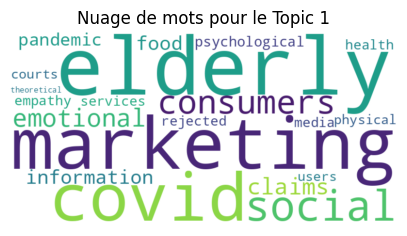

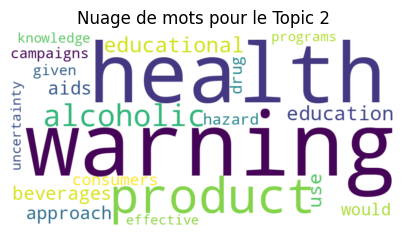

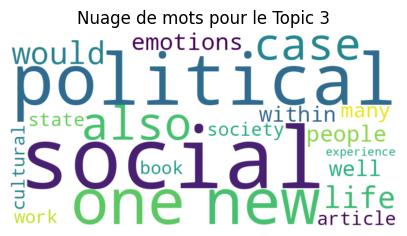

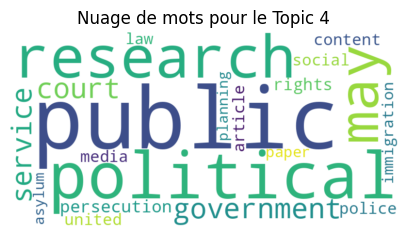

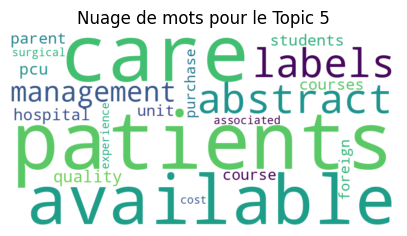

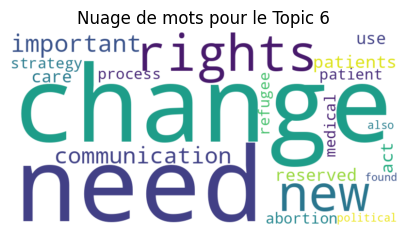

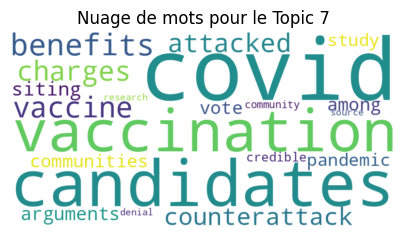

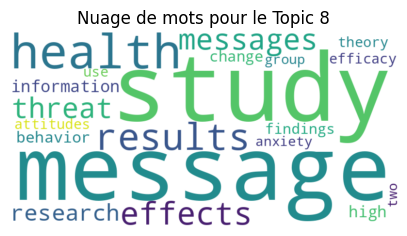

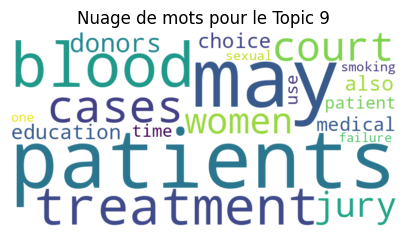

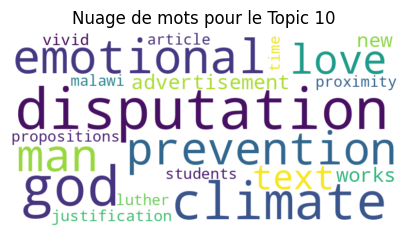

In [ ]:
import pandas as pd
import gensim
from gensim import corpora
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

# Assurez-vous que vous avez les documents et les termes
documents = Scopus['cleaned_abstract']  # Liste de documents prétraités

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Charger les mots vides (stopwords) en anglais et en français
stop_words_en = stopwords.words('english')
stop_words_fr = stopwords.words('french')

# Combine stopwords into a single list
stop_words = stop_words_en + stop_words_fr

# Add words to exclude
words_to_exclude = ["fear", "appeals", "appeal", "fears"]
stop_words.extend(words_to_exclude)

# Préparer le dictionnaire et le corpus
texts = [[word for word in doc.split() if word not in stop_words] for doc in documents]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Nombre de topics à extraire
K = 10

# Appliquer le modèle LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=K, id2word=dictionary, passes=15)

# Afficher les topics sous forme de texte
topics = lda_model.print_topics(num_words=20)
for topic in topics:
    print(topic)

# 1. Afficher les termes les plus importants de chaque topic sous forme de nuage de mots
for i, topic in enumerate(lda_model.show_topics(formatted=False, num_words=20)):
    words = dict(topic[1])

    # Filter out excluded words from the word cloud
    filtered_words = {k: v for k, v in words.items() if k not in words_to_exclude}

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_words)

    # Affichage du nuage de mots pour chaque topic
    plt.figure(figsize=(5, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Nuage de mots pour le Topic {i+1}")
    plt.show()

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print(f"Coherence Score: {coherence_score}")


Coherence Score: 0.3684178235033654


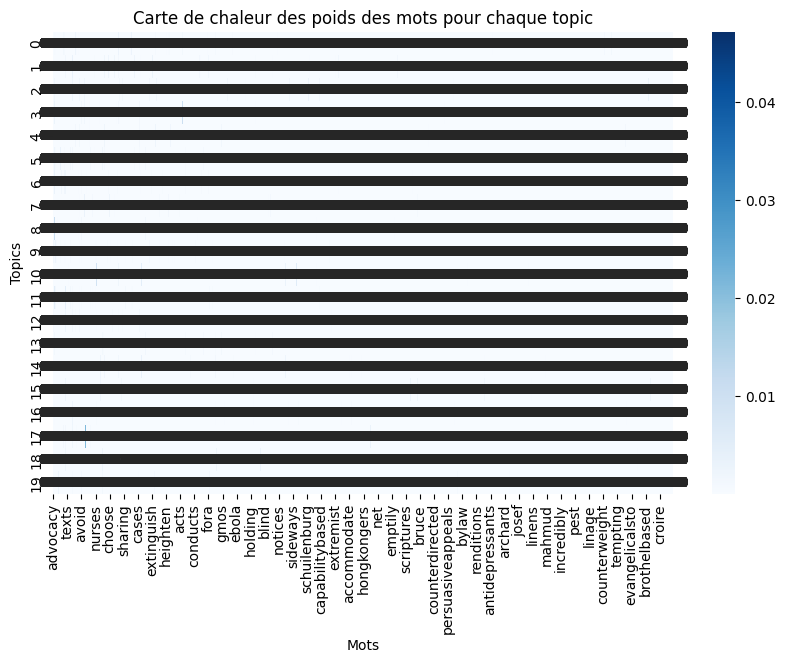

In [ ]:
# 2. Visualisation des poids des mots pour chaque topic sous forme de carte de chaleur (heatmap)

# Extraire les termes associés à chaque topic
import seaborn as sns
topics_weights = []
for topic in lda_model.get_topics():
    topics_weights.append(topic)

# Créer un DataFrame avec les poids des mots pour chaque topic
topic_df = pd.DataFrame(topics_weights, columns=dictionary.token2id.keys())

# Créer la carte de chaleur
plt.figure(figsize=(10, 6))
sns.heatmap(topic_df, cmap='Blues', annot=True, fmt='.2f', cbar=True)
plt.title("Carte de chaleur des poids des mots pour chaque topic")
plt.xlabel("Mots")
plt.ylabel("Topics")
plt.show()

###  Les termes les plus importants de tous les topics sur un seul nuage de mots

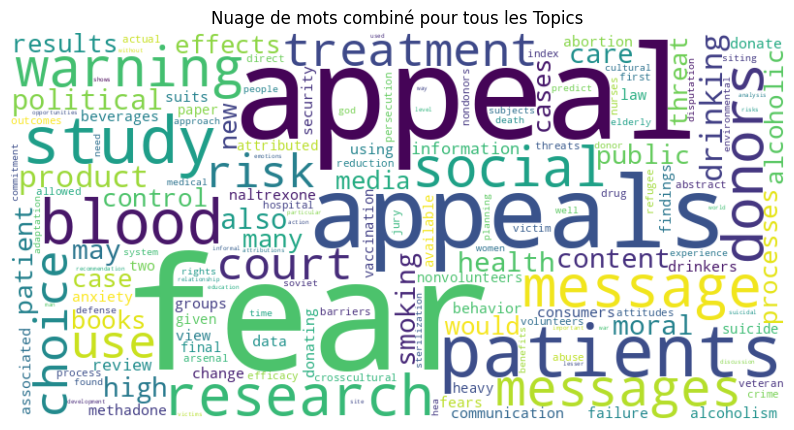

In [ ]:
import pandas as pd
import gensim
from gensim import corpora
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assurez-vous que vous avez les documents et les termes
documents = Scopus['cleaned_abstract']  # Liste de documents prétraités
stop_words = stopwords.words('english')

# Préparer le dictionnaire et le corpus
texts = [[word for word in doc.split() if word not in stop_words] for doc in documents]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Nombre de topics à extraire
K = 10  # Nombre de topics souhaités

# Appliquer le modèle LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=K, id2word=dictionary, passes=15)

# Extraire tous les termes importants de tous les topics pour le nuage de mots
all_words = {}

# Ajouter les mots de chaque topic au dictionnaire `all_words`
for topic in lda_model.show_topics(formatted=False, num_words=20):
    for word, weight in topic[1]:
        all_words[word] = all_words.get(word, 0) + weight

# Créer un nuage de mots à partir de `all_words`
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(all_words)

# Affichage du nuage de mots combiné pour tous les topics
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots combiné pour tous les Topics")
plt.show()
